In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [3]:
df=pd.read_csv('GOOG.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [5]:
df.shape

(1258, 14)

In [6]:
df=df.drop(columns=['symbol','adjClose','adjHigh','adjLow','adjOpen','adjOpen','divCash','splitFactor'],axis=1)

In [7]:
df.head()

,date,close,high,low,open,volume,adjVolume
0,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,1306065
1,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,1214517
2,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,1982471
3,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,3402357
4,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,2082538


In [8]:
df.describe()

,close,high,low,open,volume,adjVolume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1.258000e+03
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1.601590e+06
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,6.960172e+05
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,3.467530e+05
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,1.173522e+06
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1.412588e+06
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1.812156e+06
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,6.207027e+06


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1258 non-null   object 
 1   close      1258 non-null   float64
 2   high       1258 non-null   float64
 3   low        1258 non-null   float64
 4   open       1258 non-null   float64
 5   volume     1258 non-null   int64  
 6   adjVolume  1258 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 68.9+ KB


In [13]:
df.describe()

,close,high,low,open,volume,adjVolume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1.258000e+03
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1.601590e+06
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,6.960172e+05
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,3.467530e+05
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,1.173522e+06
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1.412588e+06
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1.812156e+06
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,6.207027e+06


In [15]:
import plotly.graph_objects as go
figure=go.Figure(data=[go.Candlestick(x=df['date'],open=df['open'],high=df['high'],low=df['low'],close=df['close'])])
figure.update_layout(title='GOOG',xaxis_rangeslider_visible=False)
figure.show()

In [16]:
df=df.drop(columns=['date'],axis=1)
df.head()

,close,high,low,open,volume,adjVolume
0,718.27,722.47,713.1200,716.48,1306065,1306065
1,718.92,722.98,717.3100,719.00,1214517,1214517
2,710.36,716.65,703.2600,714.91,1982471,1982471
3,691.72,708.82,688.4515,708.65,3402357,3402357
4,693.71,702.48,693.4100,698.77,2082538,2082538


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   close      1258 non-null   float64
 1   high       1258 non-null   float64
 2   low        1258 non-null   float64
 3   open       1258 non-null   float64
 4   volume     1258 non-null   int64  
 5   adjVolume  1258 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 59.1 KB


In [18]:
df.duplicated().sum().any()

False

In [19]:
df.isnull().values.any()

False

In [20]:
df.describe()

,close,high,low,open,volume,adjVolume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1.258000e+03
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1.601590e+06
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,6.960172e+05
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,3.467530e+05
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,1.173522e+06
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1.412588e+06
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1.812156e+06
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,6.207027e+06


In [21]:
print(df.corr())

              close      high       low      open    volume  adjVolume
close      1.000000  0.999528  0.999586  0.999083 -0.025574  -0.025574
high       0.999528  1.000000  0.999354  0.999575 -0.012470  -0.012470
low        0.999586  0.999354  1.000000  0.999499 -0.035184  -0.035184
open       0.999083  0.999575  0.999499  1.000000 -0.021381  -0.021381
volume    -0.025574 -0.012470 -0.035184 -0.021381  1.000000   1.000000
adjVolume -0.025574 -0.012470 -0.035184 -0.021381  1.000000   1.000000


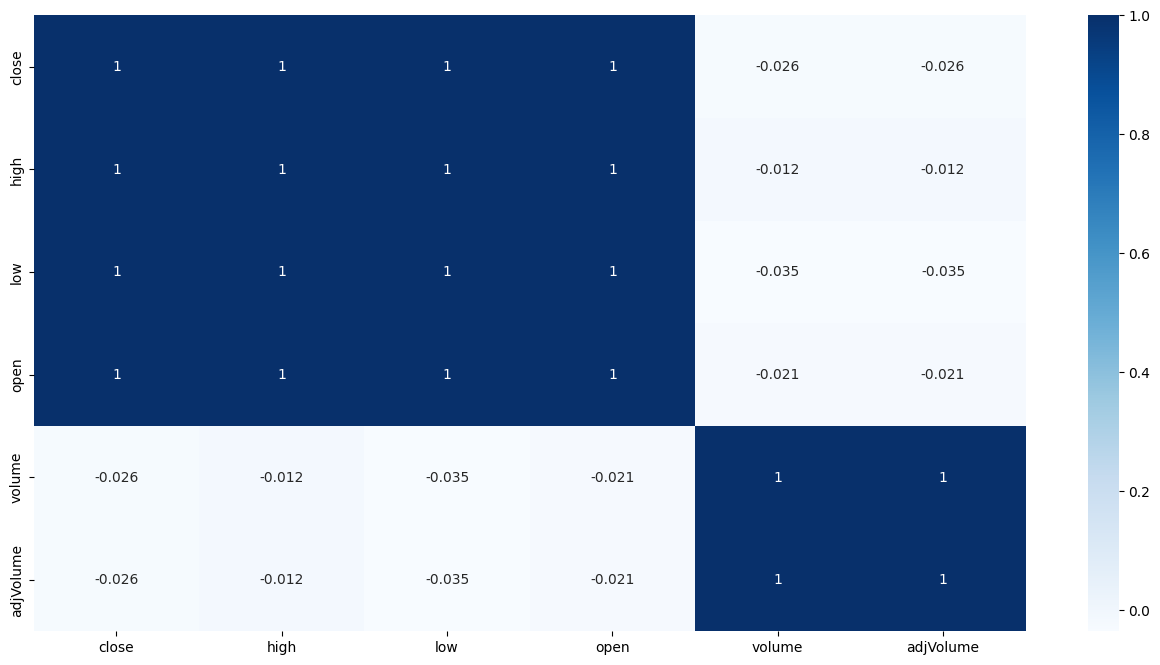

In [22]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),cmap='Blues',annot=True)
plt.show()

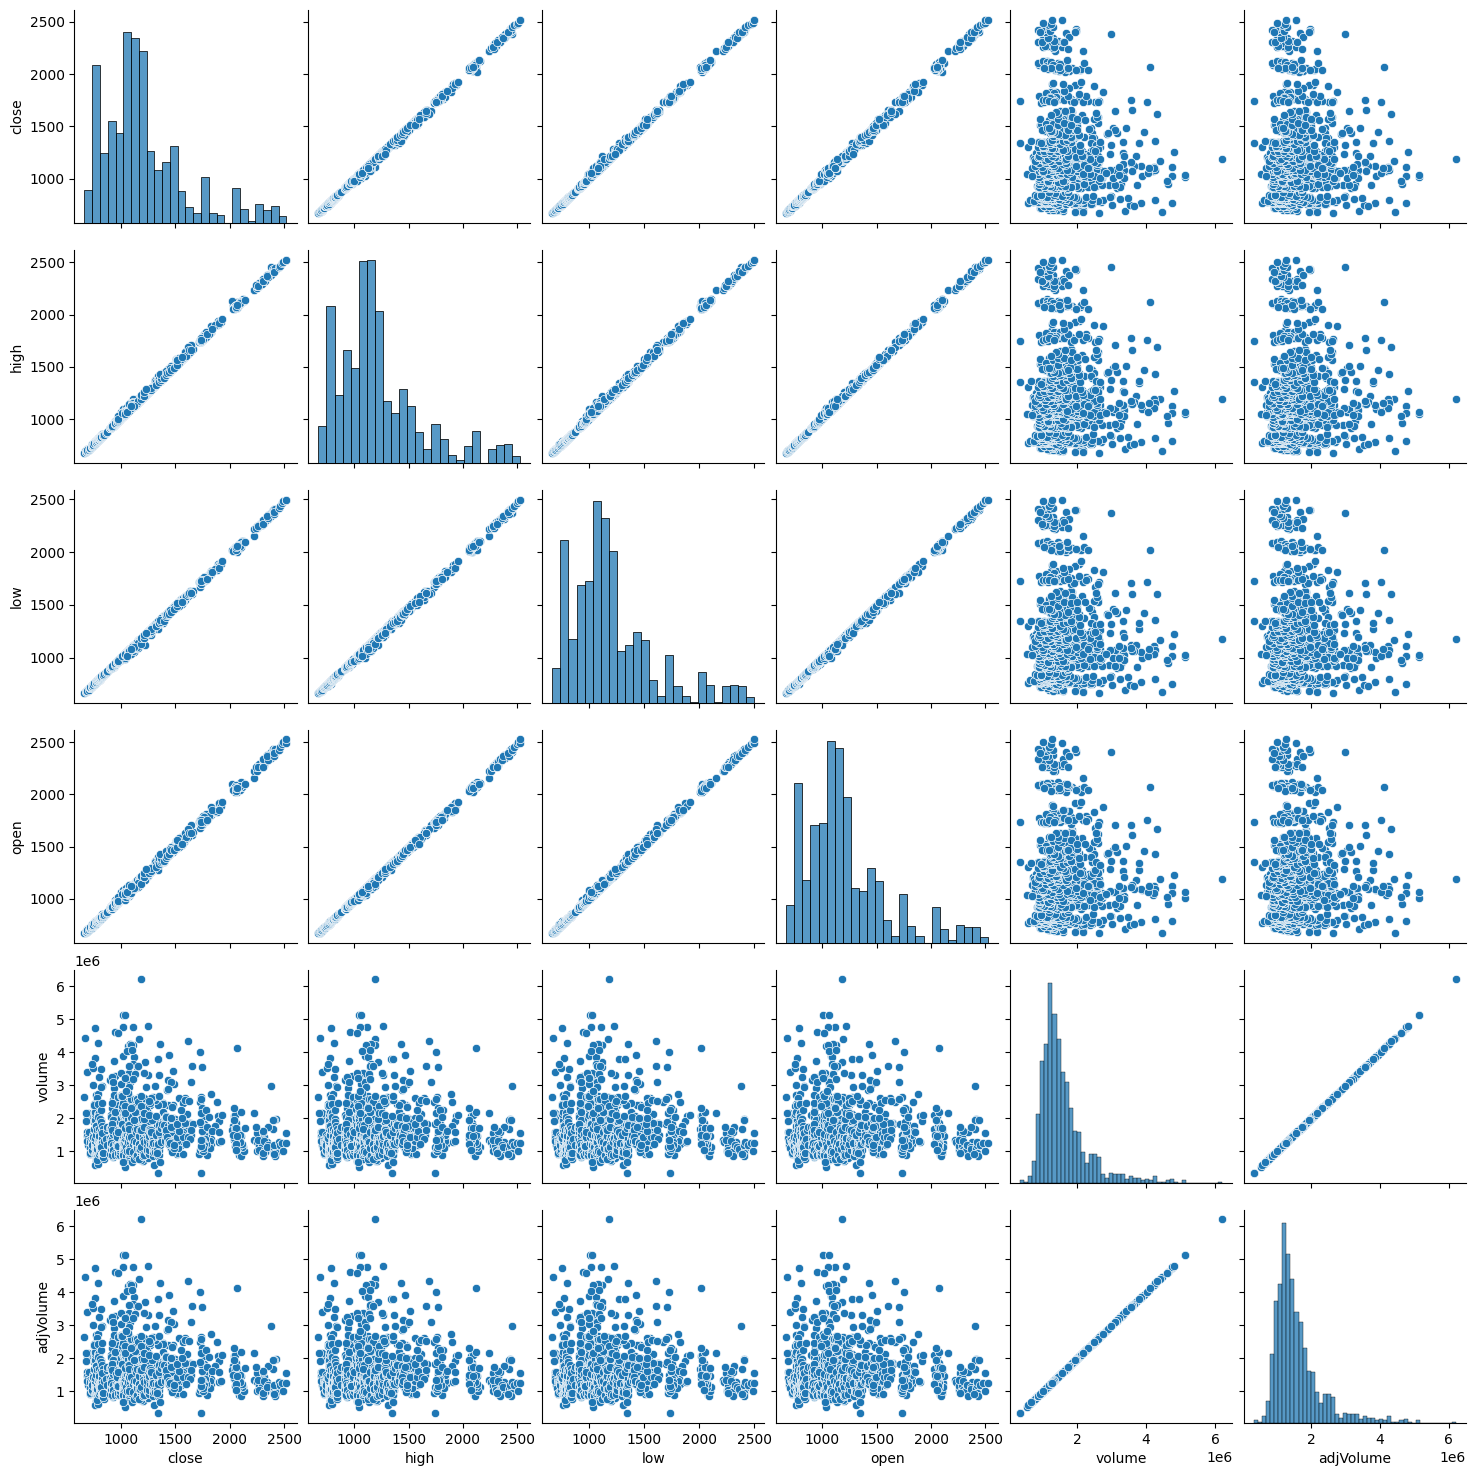

In [23]:
sns.pairplot(df)

<Axes: >

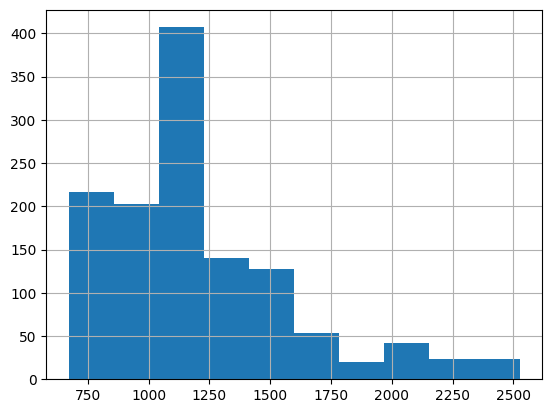

In [24]:
df['open'].hist()

<Axes: >

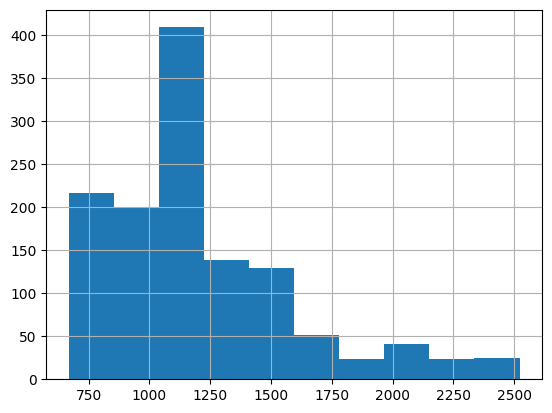

In [25]:
df['close'].hist()

<Axes: >

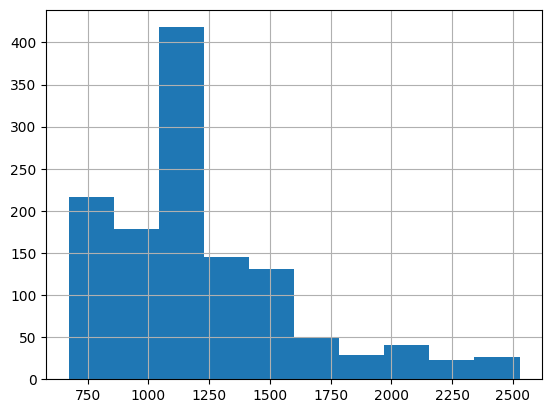

In [26]:
df['high'].hist()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score,f1_score

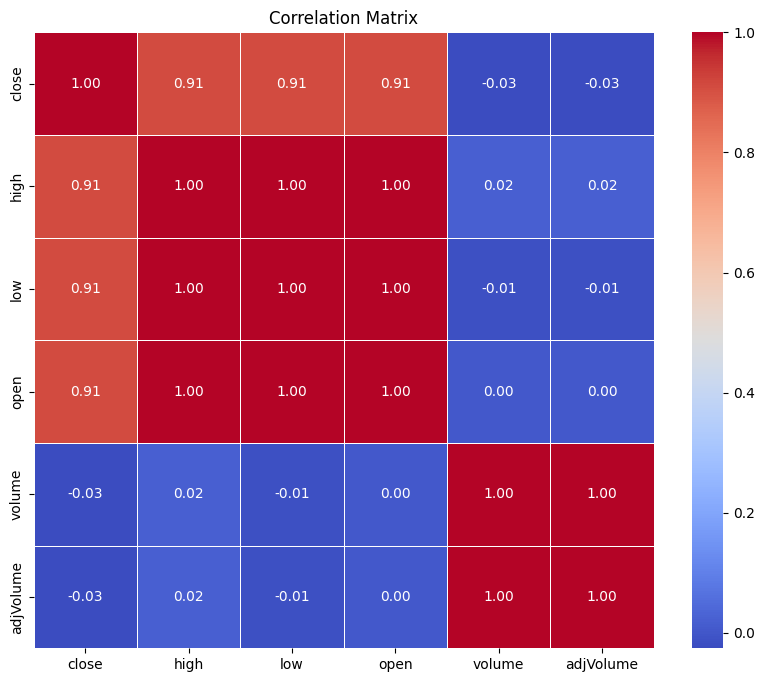

In [28]:
label_encoder = LabelEncoder()
df['open'] = label_encoder.fit_transform(df['open'])
df['high'] = label_encoder.fit_transform(df['high'])
df['low'] = label_encoder.fit_transform(df['low'])
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [29]:
x=df[['open','high','low','volume']].values
y=df['close'].values

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [31]:
print('Train:',x_train.shape)

print('Test:',x_test.shape)

Train: (1006, 4)
Test: (252, 4)


In [32]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
model=regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

In [33]:
predicted = model.predict(x_test)

In [34]:
print('Model Coefficients:',regressor.coef_)
print('Model intercept:',regressor.intercept_)

Model Coefficients: [-3.90300001e-02  9.14931209e-01  1.04474730e-01 -2.48017646e-05]
Model intercept: 650.004080199202


In [35]:
dframe=pd.DataFrame(y_test,predicted)
dfr=pd.DataFrame({'Actual_Price':y_test,'Predicted_Price':predicted})
print(dfr)

     Actual_Price  Predicted_Price
0          695.94       625.287393
1         1084.99      1080.568162
2          769.54       687.497348
3         1349.33      1513.152250
4          843.25       808.796405
..            ...              ...
247       1567.24      1647.687363
248        745.91       592.057272
249       1175.84      1276.609920
250        762.49       662.766128
251       1036.23       953.592644

[252 rows x 2 columns]


In [36]:
dfr.describe()

,Actual_Price,Predicted_Price
count,252.00000,252.000000
mean,1239.92381,1246.088519
std,378.69218,347.452062
min,675.22000,542.575197
25%,1028.45250,967.302914
50%,1163.42500,1267.641048
75%,1428.65000,1551.742182
max,2411.56000,1825.387874


<ipython-input-37-28ded086a1c8>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: ylabel='Density'>

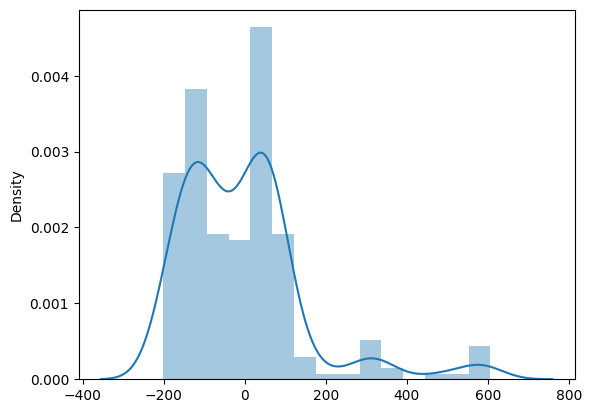

In [37]:
residual=y_test-predicted
sns.distplot(residual)